Analysis

Observation 1 : 
The highest temperature are correlated to the latitutes 0:40 which makes sense since it is summer in the nortern hemisphere in July. Also the the 3 cities with temperatures > 100 are in a between 20 -40 latitude which are looks like the desert in both the US, Africa, and across the globe.

Observation 2: 
There doesn't seem to be a correlation between cloudiness and wind speed to latitude but the cities with the wind speeds above 20 are all costal cities which makes sense since there is nothing buffering the wind.

Observation 3: 
There doesn't seem to be a correlation between the humidity and latitude, but there are 1 outlier for humidity, all 1 is in the amazon basin which seems correct that it would have the highest humidity but they are close to 3 times the amount of the average from the other cities in the sample which is surprising.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random as random
import seaborn as sns
import datetime
#from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_data_file = "weather_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

623


In [3]:
# Go to url and set parameters to call the api
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
       "appid": "7db4c1aefa6207240ed72617697380d3",
       "q": "Denver"
   }
# Convert the info to json to view the dict of the data
resp = requests.get(base_url, params = params)
resp.json()


{'coord': {'lon': -104.98, 'lat': 39.74},
 'weather': [{'id': 211,
   'main': 'Thunderstorm',
   'description': 'thunderstorm',
   'icon': '11d'}],
 'base': 'stations',
 'main': {'temp': 299.54,
  'pressure': 1021,
  'humidity': 28,
  'temp_min': 294.26,
  'temp_max': 305.15},
 'visibility': 16093,
 'wind': {'speed': 7.7, 'deg': 10, 'gust': 11.8},
 'clouds': {'all': 75},
 'dt': 1563227556,
 'sys': {'type': 1,
  'id': 3292,
  'message': 0.0123,
  'country': 'US',
  'sunrise': 1563191050,
  'sunset': 1563244029},
 'timezone': -21600,
 'id': 5419384,
 'name': 'Denver',
 'cod': 200}

In [4]:
# Create a function to call Open Weather API and extract the information
def city_data(city_name):
   base_url = "http://api.openweathermap.org/data/2.5/weather"
   params = {
       "appid": "137d0c77211d955fd39723bff4d580fc",
       "q": city_name,
       "units":"imperial"
   }
   resp = requests.get(base_url, params=params).json()
   name = resp.get("name")
   temp = resp.get('main').get('temp')
   humi = resp.get('main').get('humidity')
   clou = resp.get('clouds').get('all')
   wind = resp.get('wind').get('speed')
   lat = resp.get("coord").get('lat')
   lng = resp.get("coord").get('lon')
   coun = resp.get('sys').get('country'),
   citi_id = resp.get('id')
   date = resp.get('dt')
   return {
       "City" : name,
       "temp": temp,
       "lat": lat,
       "lng": lng,
        "humidity": humi,
        "Cloudiness": clou,
        "Wind Speed": wind,
        'Date': date
   }
# Create a list for the city information
city_info = []

# Set a count to count the api calls
x = 1

# The try to see if lat and lng is near a actual city and if yes then append to dataframe and print
# url and the # of call, the total calls, and the city from the api
for city in cities:
    print('Retreiving data for City # ' + str(x) + ' of ' + str((len(cities))) + '...' + city)
    print(base_url)

    try:
        city_info.append(city_data(city))
        x = x + 1
    
# If lat and lng is not near a city then print out wrong city    
    except:
        print('Wrong city name')
        print(50 * '-')

# Append data into dataframe
weather_df = pd.DataFrame.from_records(city_info).set_index('City')


Retreiving data for City # 1 of 623...illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 1 of 623...lagoa
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 2 of 623...provideniya
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 3 of 623...tiksi
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 4 of 623...atuona
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 5 of 623...vanavara
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 6 of 623...rikitea
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 7 of 623...nikolskoye
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 8 of 623...bodden town
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 9 of 623...cabo san lucas
http://api.openweathermap.o

Retreiving data for City # 81 of 623...buraydah
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 82 of 623...cherskiy
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 83 of 623...kisangani
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 84 of 623...barrow
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 85 of 623...grand river south east
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 85 of 623...vaini
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 86 of 623...kindu
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 87 of 623...amderma
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 87 of 623...marcona
http://api.openweathermap.org/data/2.5/weather
Wrong 

Retreiving data for City # 149 of 623...lolua
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 149 of 623...vila velha
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 150 of 623...lahij
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 151 of 623...saskylakh
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 152 of 623...kodiak
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 153 of 623...tsihombe
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 153 of 623...pong
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 154 of 623...kidal
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 155 of 623...ixtapa
http://api.openweathermap.org/data/2.5/weather
Retreiving data 

Retreiving data for City # 212 of 623...trelew
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 213 of 623...kimbe
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 214 of 623...olafsvik
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 214 of 623...kapit
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 215 of 623...dalby
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 216 of 623...ijaki
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 216 of 623...hofn
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 217 of 623...georgiyevka
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 218 of 623...litovko
http://api.openweathermap.org/data/2.5/weather
Retreiving data fo

Retreiving data for City # 276 of 623...medicine hat
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 277 of 623...saint-augustin
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 278 of 623...sterling
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 279 of 623...lopatyn
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 280 of 623...kavaratti
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 281 of 623...yerbogachen
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 282 of 623...halalo
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 282 of 623...tocopilla
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 283 of 623...vardo
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 284 of 623...daund
http://api.ope

Retreiving data for City # 347 of 623...port macquarie
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 348 of 623...guerrero negro
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 349 of 623...pemba
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 350 of 623...iskateley
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 351 of 623...rafai
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 352 of 623...doiwala
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 353 of 623...erzin
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 354 of 623...coos bay
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 355 of 623...kotaparh
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 356 of 623...biryusinsk
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 357 of 6

Retreiving data for City # 410 of 623...zhezkazgan
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 411 of 623...naze
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 412 of 623...san rafael
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 413 of 623...oyem
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 414 of 623...bilma
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 415 of 623...saint-francois
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 416 of 623...byron bay
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 417 of 623...oum hadjer
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 418 of 623...mazamari
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 419 of 623...bilibino
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 420 of 623.

Retreiving data for City # 477 of 623...amudat
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 478 of 623...shumskiy
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 479 of 623...sitangkai
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 480 of 623...saldanha
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 481 of 623...himora
http://api.openweathermap.org/data/2.5/weather
Wrong city name
--------------------------------------------------
Retreiving data for City # 481 of 623...maun
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 482 of 623...nhulunbuy
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 483 of 623...carolina
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 484 of 623...port-cartier
http://api.openweathermap.org/data/2.5/weather
Retreiving data for City # 485 of 623...cuamba
http://api.openweatherma

In [5]:
weather_df.head()

,Cloudiness,Date,Wind Speed,humidity,lat,lng,temp
City,,,,,,,
Lagoa,0,1563227605,10.29,61,37.14,-8.45,72.46
Provideniya,20,1563227816,17.90,76,64.42,-173.23,55.40
Tiksi,94,1563227791,21.72,62,71.64,128.87,45.66
Atuona,0,1563227816,17.40,76,-9.80,-139.03,80.76
Vanavara,100,1563227773,8.93,87,60.35,102.28,63.66


In [6]:
weather_df.count()

Cloudiness    537
Date          537
Wind Speed    537
humidity      537
lat           537
lng           537
temp          537
dtype: int64

In [7]:
# Convert the timestamp to regular date
tmpDate = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%Y-%m-%d')

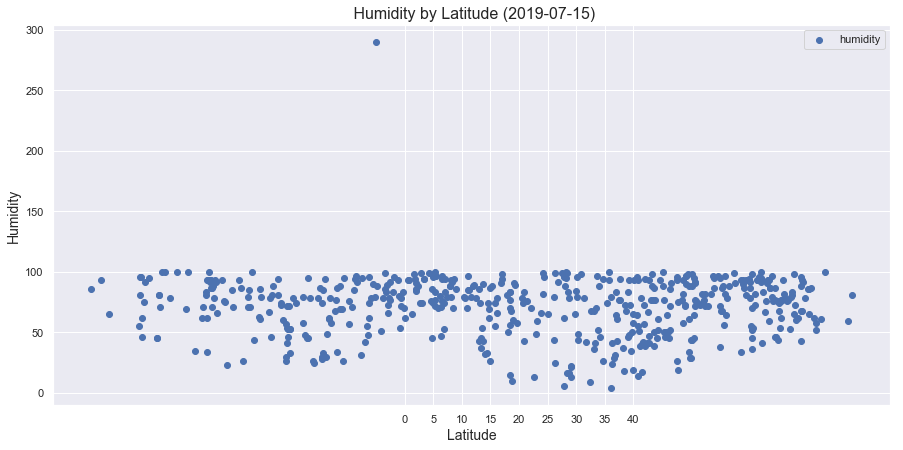

In [8]:
# Plot Humidity by Latitutde
sns.set()

plt.figure(figsize = (15, 7))
plt.scatter(x = weather_df['lat'], y = weather_df['humidity'])

plt.legend(loc = 'best')

#Set the plot details such as tick intervals, size and titles on x, y, and title.  Save and show plot
plt.grid(True)
plt.title(' Humidity by Latitude (' + tmpDate +')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Humidity.png')

plt.show()


In [9]:
weather_df.loc[weather_df['humidity']>150]

,Cloudiness,Date,Wind Speed,humidity,lat,lng,temp
City,,,,,,,
Paita,0,1563228220,13.87,290,-5.09,-81.11,62.6


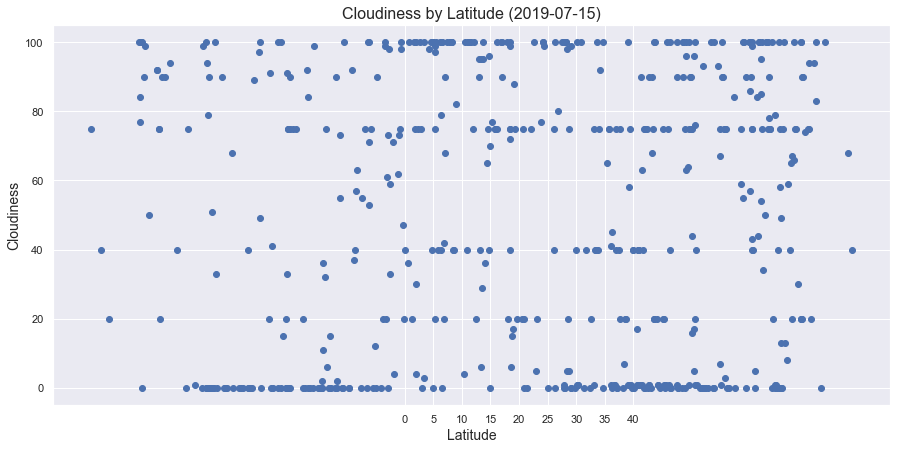

In [10]:
#Plot by Cloudiness
plt.figure(figsize = (15, 7))
plt.scatter(x = weather_df['lat'], y = weather_df['Cloudiness'])

plt.grid(True)
plt.title('Cloudiness by Latitude (' + tmpDate +')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Cloudiness', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Cloudiness.png')

plt.show()

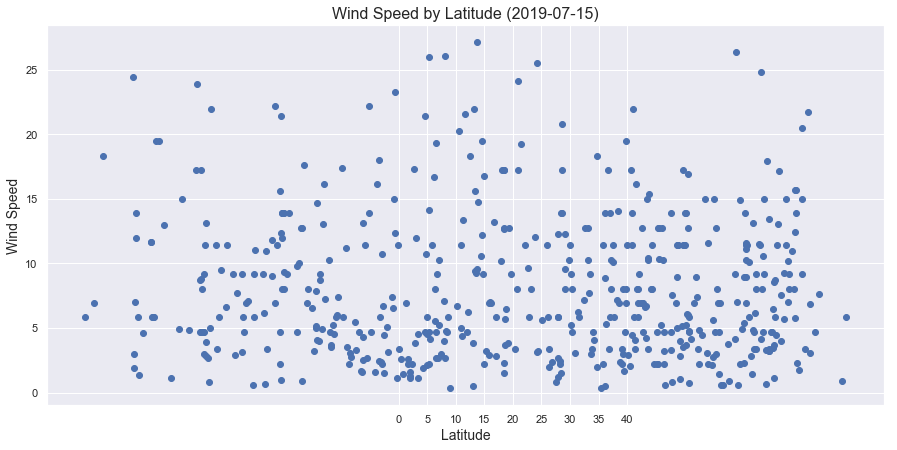

In [11]:
#Plot by windspeed
plt.figure(figsize = (15, 7))
plt.scatter(x = weather_df['lat'], y = weather_df['Wind Speed'])


plt.grid(True)
plt.title('Wind Speed by Latitude (' + tmpDate +')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Wind Speed', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('WindSpeed.png')

plt.show()

In [12]:
weather_df.loc[weather_df['Wind Speed']>20]

,Cloudiness,Date,Wind Speed,humidity,lat,lng,temp
City,,,,,,,
Tiksi,94,1563227791,21.72,62,71.64,128.87,45.66
Tadine,100,1563228093,22.15,74,-21.55,167.88,69.78
Hithadhoo,100,1563227774,23.24,72,-0.60,73.08,83.64
Mar del Plata,100,1563227796,24.47,55,-46.43,-67.52,47.10
Chokurdakh,94,1563227778,20.47,86,70.62,147.90,39.90
Koumac,91,1563228121,21.43,72,-20.56,164.28,69.42
Keti Bandar,100,1563228126,25.55,82,24.14,67.45,83.28
Ahipara,99,1563227818,23.89,71,-35.17,173.16,58.62
Hobyo,97,1563227640,25.95,72,5.35,48.53,76.62


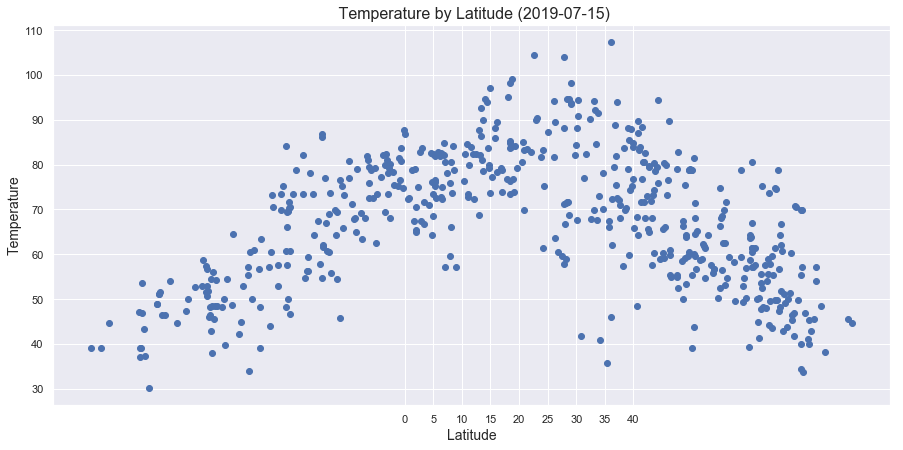

In [13]:
#Plot by Temperature
plt.figure(figsize = (15, 7))
plt.scatter(x = weather_df['lat'], y = weather_df['temp'])

plt.grid(True)
plt.title(' Temperature by Latitude (' + tmpDate +')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Temperature.png')

plt.show()

In [14]:
weather_df.loc[weather_df['temp']>100]

,Cloudiness,Date,Wind Speed,humidity,lat,lng,temp
City,,,,,,,
Taoudenni,100,1563227784,9.62,13,22.68,-3.98,104.52
Adrar,0,1563228123,5.82,6,27.87,-0.29,104.00
Henderson,1,1563228064,13.87,4,36.04,-114.98,107.33
